# INTRODUCTION TO REGRESSION

# WHAT IS REGRESSION

Regression analysis is a set of statistical processes for estimating te relationships among variables. It is a fundamental concept in the field of machine learning. It falls under supervised learning wherein the algorithm is trained with both input features and output labels. It helps in establishing a relationship among the variables by estimating how one variable affects te other

# TYPES OF REGRESSION

## WHAT IS LINEAR REGRESSION

Linear regression is the statistical model used to predict the relationship between independent and dependent model by examining two factors. The first which is the variaables(significant predictors) and the second one is how significant is the regression loine to make predictions with the highest possible accuracy
linear egression is a linear approach for modelling the relationship between a calar dependent variable and an independent variable x.lets look at a linear regression example

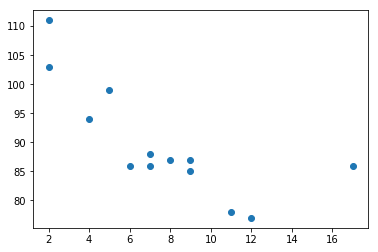

In [59]:
import matplotlib.pyplot as plt
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
plt.scatter(x,y)
plt.show()

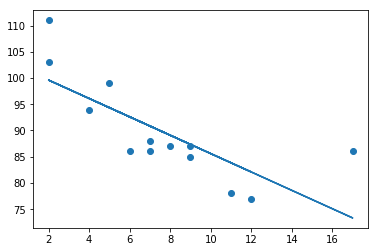

In [60]:
import matplotlib.pyplot as plt
from scipy import stats
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope,intercept ,r,p,std_err=stats.linregress(x,y)
def myfunc(x):
    return slope*x+intercept
mymodel = list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

# TERMINOLOGIES IN LINEAR REGRESSION

Assignment

# APPLICATION OF LINEAR REGRESSION

# IMPLEMENTING LINEAR REGRESSION

In [61]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('insurance.csv')

In [63]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. But in this case, nothing will change, because there is no special order in which the regions would be listed

Now let's check the correlation of the features

In [66]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

A strong correlation is observed only with the fact of smoking the patient.

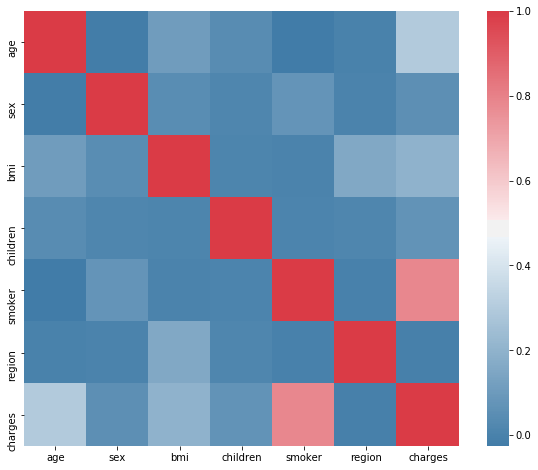

In [67]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

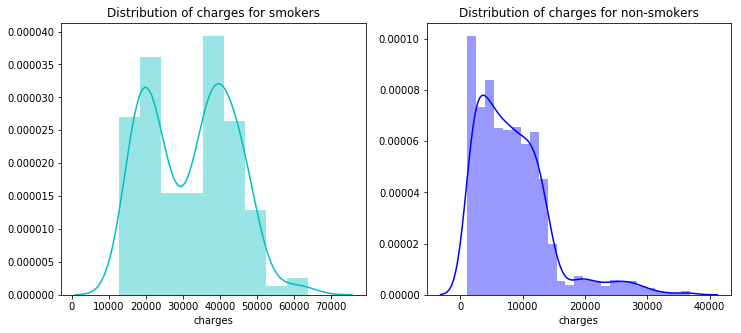

In [68]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

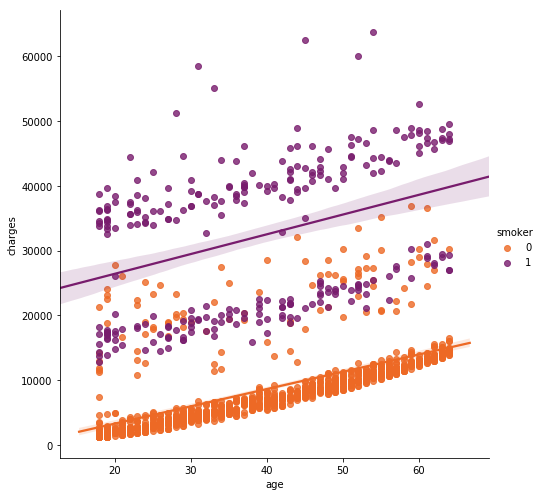

In [69]:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [71]:
x = data.drop(['charges'], axis = 1)
y = data.charges

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.18, random_state = 0)

In [73]:
lr = LinearRegression()
lr.fit(x_train,y_train)

lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,lr_train_pred),
mean_squared_error(y_test,lr_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,lr_train_pred),
r2_score(y_test,lr_test_pred)))

0.7883779649726497
MSE train data: 37296138.623, MSE test data: 33111812.483
R2 train data: 0.742, R2 test data: 0.788


In [74]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

print(rf.score(x_test,y_test))
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,rf_train_pred),
mean_squared_error(y_test,rf_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,rf_train_pred),
r2_score(y_test,rf_test_pred)))

0.840731352431188
MSE train data: 4870946.808, MSE test data: 24920247.988
R2 train data: 0.966, R2 test data: 0.841


In [75]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

gb_train_pred = gb.predict(x_train)
gb_test_pred = gb.predict(x_test)

print(gb.score(x_test,y_test))
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,gb_train_pred),
mean_squared_error(y_test,gb_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,gb_train_pred),
r2_score(y_test,gb_test_pred)))

0.8895681679813547
MSE train data: 14332045.868, MSE test data: 17278910.079
R2 train data: 0.901, R2 test data: 0.890


In [76]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

dt_train_pred = dt.predict(x_train)
dt_test_pred = dt.predict(x_test)

print(dt.score(x_test,y_test))
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,dt_train_pred),
mean_squared_error(y_test,dt_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,dt_train_pred),
r2_score(y_test,dt_test_pred)))

0.6633844403702125
MSE train data: 238228.189, MSE test data: 52669143.305
R2 train data: 0.998, R2 test data: 0.663


Not bad for such a lazy implementation, even without data normalization:D
After all, the data will not always be so "good"

Already good. Our model predicts well the cost of treatment of patients. I think we could limit ourselves to creating two or three polynomial features, so we went the easy way.
And finally try RandomForestRegressor

In [77]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3597631.444, MSE test data: 21593390.608
R2 train data: 0.975, R2 test data: 0.862


# REGRESSION METRICS